#Linear Programing In Python : Deciding Where to Go on Vacation

This iPython Notebook is an Example of Constructing a Linear Program in Python with PULP module.

----------
**Problem Formulation:**
You want to go on vacation, but you have only limited number of days. On top of it, we also want keep the cost at minimum.
And the internet offers plenty of options how to decide, so which packages/mix of packages should we select? 

----------
> - Objective: Minimize Cost of Vacation while selecting Optimal Vacation Package
> - LP Form: Minimization
> - Decision Variables: Binary Variables whether to purchase the package or not.
> - Constrains: Limited Number of Vacation

In [14]:
from pulp import *
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

**Getting the Data**
>There are multiple websites that provide full-priced and discount vacation packages.
The dataset from this problem was scraped from The Clymb Adventures http://www.theclymb.com/adventures 

![TheClymb](https://photos-1.dropbox.com/t/2/AAB8eX8O_-HLLEXt482rsjiDDj-Cy-mvF1DZT6MjP5GKVg/12/49846494/png/32x32/1/_/1/2/thclymb.png/ENCbqCYY-KgMIAEoAQ/S5J_1b9un4Uy-zuWdfU7bKaGgVECPSAFNnMgrfDttqA?size=1024x768&size_mode=2)


**Understanding the Dataset**
>The dataset contains:
> - Final Destination
> - Duration of the trip
> - Total Cost of the trip
> - Short Description of the adventure

In [15]:
data = pd.read_csv('clymb_adventures.csv')
data[:5]

,destination,duration,cost
0,Baja,7,899
1,Nepal,11,899
2,Spain,8,568
3,Yosemite,5,750
4,Utah,6,1356


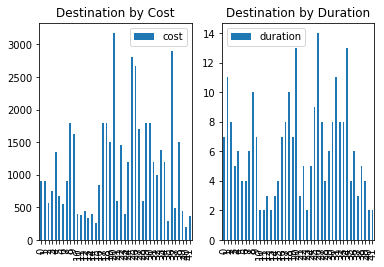

In [17]:
fig, axs = plt.subplots(1,2)
my_plot = data[['destination', 'cost']].plot(kind='bar', title="Destination by Cost", ax=axs[0])
my_plot = data[['destination', 'duration']].plot(kind='bar', title="Destination by Duration", ax=axs[1])

**Setting Up LP Problem:**

> Define The LP Object

> The *prob* variable is created to contain the formulation, and the usual parameters are passed into LpProblem.

In [18]:
# create the LP object, set up as a minimization problem --> since we want to minimize the costs 
prob = pulp.LpProblem('GoingOnVacation', pulp.LpMinimize)

> Create Decision Variables:

In [19]:
decision_variables = []
for rownum, row in data.iterrows():
	variable = str('x' + str(rownum))
	variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
	decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))
print ("Array with Decision Variables:" + str(decision_variables))

Total number of decision_variables: 42
Array with Decision Variables:[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41]


> Define Objective Function: (*Minimixing the Cost of The Trip*)

> The variable prob now begins collecting problem data with the += operator. The objective function is logically entered first, with an important comma , at the end of the statement and a short string explaining what this objective function is:

In [20]:
total_cost = ""
for rownum, row in data.iterrows():
	for i, schedule in enumerate(decision_variables):
		if rownum == i:
			formula = row['cost']*schedule
			total_cost += formula

prob += total_cost
print ("Optimization function: " + str(total_cost))	

Optimization function: 899*x0 + 899*x1 + 399*x10 + 385*x11 + 439*x12 + 339*x13 + 399*x14 + 265*x15 + 849*x16 + 1799*x17 + 1799*x18 + 1499*x19 + 568*x2 + 3175*x20 + 599*x21 + 1450*x22 + 399*x23 + 1199*x24 + 2799*x25 + 2675*x26 + 1699*x27 + 599*x28 + 1798*x29 + 750*x3 + 1799*x30 + 1199*x31 + 999*x32 + 1375*x33 + 1199*x34 + 299*x35 + 2898*x36 + 499*x37 + 1499*x38 + 450*x39 + 1356*x4 + 198*x40 + 375*x41 + 680*x5 + 559*x6 + 899*x7 + 1799*x8 + 1625*x9


> Define Constrains: (*Selected Packages should not exceed total vacation days available*)

In [21]:
aval_vacation_days = 10
total_vacation_days = ""
for rownum, row in data.iterrows():
	for i, schedule in enumerate(decision_variables):
		if rownum == i:
			formula = row['duration']*schedule
			total_vacation_days += formula

prob += (total_vacation_days == aval_vacation_days)

>The Final Format

In [22]:
print (prob)
prob.writeLP("GoingOnVacation.lp" )

GoingOnVacation:
MINIMIZE
899*x0 + 899*x1 + 399*x10 + 385*x11 + 439*x12 + 339*x13 + 399*x14 + 265*x15 + 849*x16 + 1799*x17 + 1799*x18 + 1499*x19 + 568*x2 + 3175*x20 + 599*x21 + 1450*x22 + 399*x23 + 1199*x24 + 2799*x25 + 2675*x26 + 1699*x27 + 599*x28 + 1798*x29 + 750*x3 + 1799*x30 + 1199*x31 + 999*x32 + 1375*x33 + 1199*x34 + 299*x35 + 2898*x36 + 499*x37 + 1499*x38 + 450*x39 + 1356*x4 + 198*x40 + 375*x41 + 680*x5 + 559*x6 + 899*x7 + 1799*x8 + 1625*x9 + 0
SUBJECT TO
_C1: 7 x0 + 11 x1 + 2 x10 + 2 x11 + 3 x12 + 2 x13 + 3 x14 + 4 x15 + 7 x16
 + 8 x17 + 10 x18 + 7 x19 + 8 x2 + 13 x20 + 3 x21 + 5 x22 + 2 x23 + 5 x24
 + 9 x25 + 14 x26 + 8 x27 + 4 x28 + 6 x29 + 5 x3 + 8 x30 + 11 x31 + 8 x32
 + 8 x33 + 13 x34 + 4 x35 + 6 x36 + 3 x37 + 5 x38 + 4 x39 + 6 x4 + 2 x40
 + 2 x41 + 4 x5 + 4 x6 + 6 x7 + 10 x8 + 7 x9 = 10

VARIABLES
0 <= x0 <= 1 Integer
0 <= x1 <= 1 Integer
0 <= x10 <= 1 Integer
0 <= x11 <= 1 Integer
0 <= x12 <= 1 Integer
0 <= x13 <= 1 Integer
0 <= x14 <= 1 Integer
0 <= x15 <= 1 Integer
0 

> The Actual Optimization:

In [23]:

optimization_result = prob.solve()

assert optimization_result == pulp.LpStatusOptimal
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
	print(v.name, "=", v.varValue)

Status: Optimal
Optimal Solution to the problem:  762.0
Individual decision_variables: 
x0 = 0.0
x1 = 0.0
x10 = 0.0
x11 = 0.0
x12 = 0.0
x13 = 0.0
x14 = 0.0
x15 = 1.0
x16 = 0.0
x17 = 0.0
x18 = 0.0
x19 = 0.0
x2 = 0.0
x20 = 0.0
x21 = 0.0
x22 = 0.0
x23 = 0.0
x24 = 0.0
x25 = 0.0
x26 = 0.0
x27 = 0.0
x28 = 0.0
x29 = 0.0
x3 = 0.0
x30 = 0.0
x31 = 0.0
x32 = 0.0
x33 = 0.0
x34 = 0.0
x35 = 1.0
x36 = 0.0
x37 = 0.0
x38 = 0.0
x39 = 0.0
x4 = 0.0
x40 = 1.0
x41 = 0.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
x8 = 0.0
x9 = 0.0


> The results are stored 
> If you don't pass the names to the variables and want to append the decision variables back in your desired file format, you want to loop through variable name object. 

> Depending on your initial data format you might want to parse the results differently. Since in this example we have used pandas dataframe, we will use the number of the variable as index to append the results back to initial dataset

In [30]:
variable_name = []
variable_value = []

for v in prob.variables():
	variable_name.append(v.name)
	variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
	value = re.findall(r'(\d+)', row['variable'])
	df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_values(by='variable')

#append results
for rownum, row in data.iterrows():
	for results_rownum, results_row in df.iterrows():
		if rownum == results_row['variable']:
			data.loc[rownum, 'decision'] = results_row['value']
            
data[:5]
data.head(16)

,destination,duration,cost,decision
0,Baja,7,899,0.0
1,Nepal,11,899,0.0
2,Spain,8,568,0.0
3,Yosemite,5,750,0.0
4,Utah,6,1356,0.0
5,Utah,4,680,0.0
6,San Juan Islands,4,559,0.0
7,Oregon,6,899,0.0
8,Hawaii,10,1799,0.0
9,Alaska,7,1625,0.0


> The Final Decisions and Results of the Optimization in the "User Friendly Way":

In [58]:
data[data['decision'] == 1]

,destination,duration,cost,description,decision
15,Maine,4,265,Ride endless singletrack. Escape to Western Ma...,1
35,Oregon,4,299,Mountain bike from hut-to-hut on the Mt Hood L...,1
40,Oregon,2,198,Learn to windsurf in Hood River. Trip for 2!. ...,1


In [59]:
data[data['decision'] == 1]['cost'].sum(axis=1)

762